Balanced training data shape: (4465, 34) (4465,)
Decision Tree Performance:
[[818 263]
 [ 88 233]]
              precision    recall  f1-score   support

       False       0.90      0.76      0.82      1081
        True       0.47      0.73      0.57       321

    accuracy                           0.75      1402
   macro avg       0.69      0.74      0.70      1402
weighted avg       0.80      0.75      0.77      1402

Random Forest Performance:
[[805 276]
 [ 75 246]]
              precision    recall  f1-score   support

       False       0.91      0.74      0.82      1081
        True       0.47      0.77      0.58       321

    accuracy                           0.75      1402
   macro avg       0.69      0.76      0.70      1402
weighted avg       0.81      0.75      0.77      1402



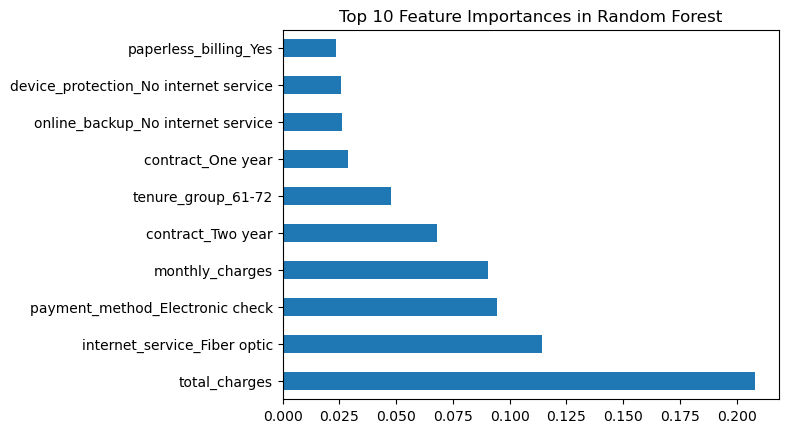

In [6]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN

# Load Dataset
df = pd.read_csv("cleaned_data_telecom.csv")

df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                            labels=['1-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Drop original tenure column as we’re using tenure_group
df.drop(columns=['tenure'], inplace=True)

# Preprocess Data
df = pd.get_dummies(df, drop_first=True)

from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# Define features and target
X = df.drop('churn_Yes', axis=1)
y = df['churn_Yes']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-ENN to balance classes in the training data
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train, y_train)
print("Balanced training data shape:", X_res.shape, y_res.shape)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_res, y_res)

# Predictions and Evaluation
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)

# Predictions and Evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

import matplotlib.pyplot as plt

# Feature importance from Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()


Decision Tree Classifier Performance:
[[758 275]
 [106 268]]
              precision    recall  f1-score   support

       False       0.88      0.73      0.80      1033
        True       0.49      0.72      0.58       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407

Random Forest Classifier Performance:
[[751 282]
 [ 97 277]]
              precision    recall  f1-score   support

       False       0.89      0.73      0.80      1033
        True       0.50      0.74      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.73      0.74      1407



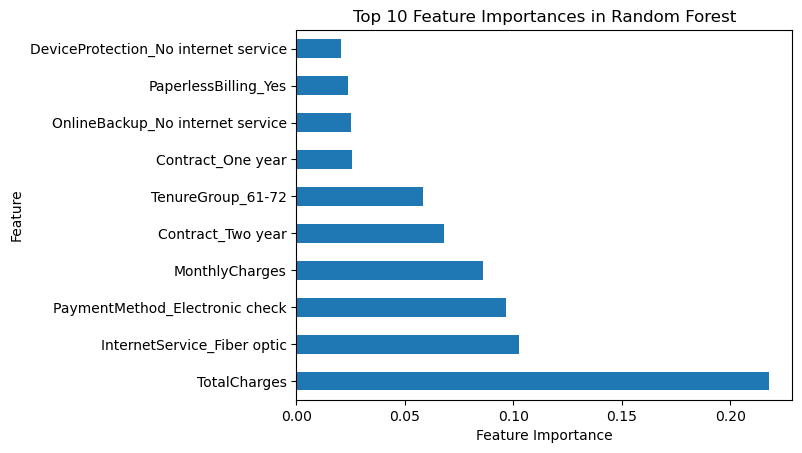

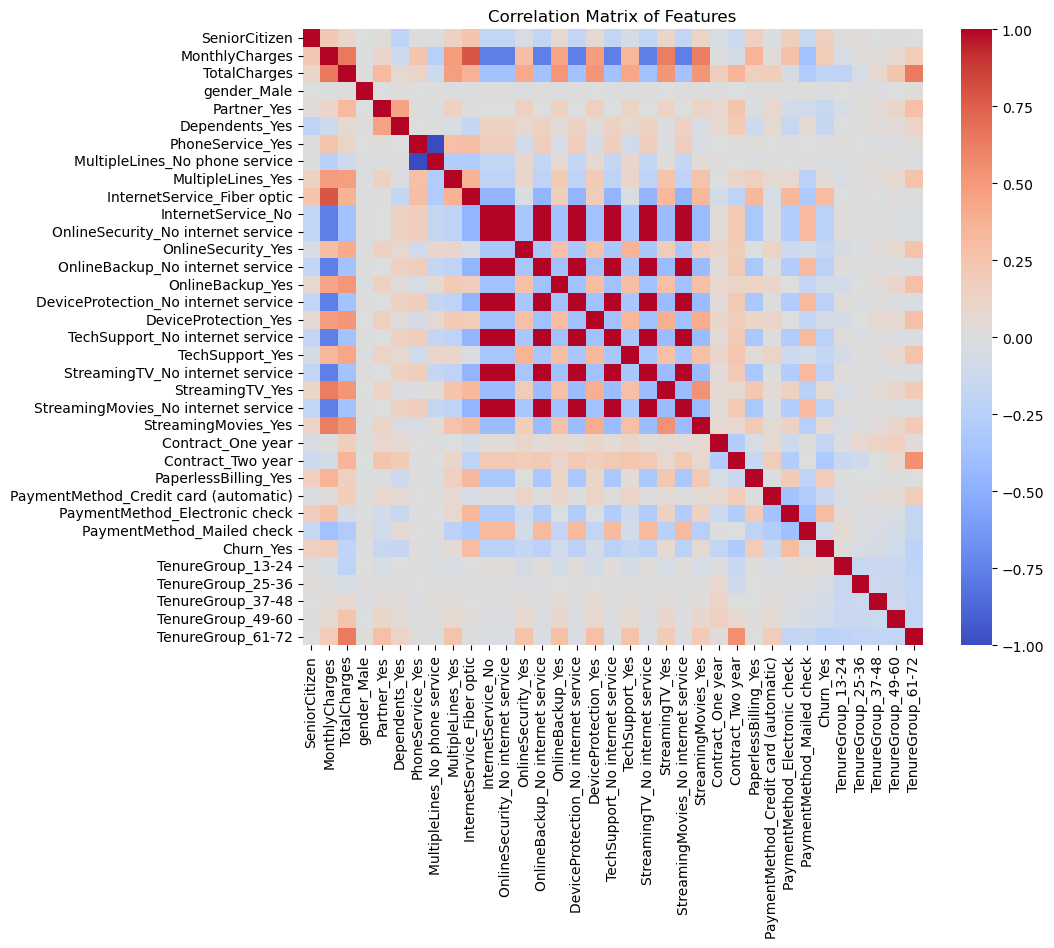

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Telecom Customers Churn.csv")

# Step 1: Data Preprocessing
# Convert `total_charges` from object to numeric, handle non-numeric values as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'total_charges'
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop 'customerID' as it is not needed for modeling
df.drop(columns=['customerID'], inplace=True)

# Step 2: Bucketize `tenure` into categories for easier interpretation
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                            labels=['1-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Drop original 'tenure' column
df.drop(columns=['tenure'], inplace=True)

# Step 3: Convert categorical variables into dummy/one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Step 4: Handling Class Imbalance with SMOTE-ENN
X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-ENN to balance classes in training data
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train, y_train)

# Step 5: Model Training and Evaluation

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_res, y_res)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classifier Performance:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 6: Feature Importance Analysis
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Step 7: Additional Insights (Correlation Analysis)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


In [17]:
df.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'TenureGroup_13-24', 'TenureGroup_25-36',
       'TenureGroup_37-48', 'TenureGroup_49-60', 'TenureGroup_61-72'],
      dtype='object')

Decision Tree Classifier Performance:
[[722 323]
 [ 79 283]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1045
           1       0.47      0.78      0.58       362

    accuracy                           0.71      1407
   macro avg       0.68      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407

Random Forest Classifier Performance:
[[742 303]
 [ 67 295]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1045
           1       0.49      0.81      0.61       362

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.74      0.75      1407



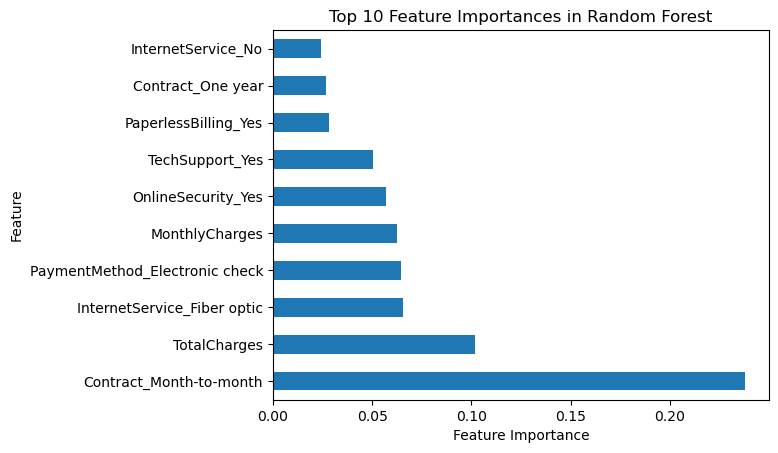

ValueError: could not convert string to float: 'Female'

<Figure size 1000x800 with 0 Axes>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Telecom Customers Churn.csv")

# Step 1: Initial Data Preprocessing
# Convert `TotalCharges` to numeric and drop rows with missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop 'customerID' as it's not needed
df.drop(columns=['customerID'], inplace=True)

# Step 2: Bucketize `tenure` into categories for easier interpretation
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                           labels=['1-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
df.drop(columns=['tenure'], inplace=True)

# Define features and target
features = df.columns.drop('Churn')
target = 'Churn'

# Step 3: Split the data before encoding
X_train, X_temp, y_train, y_temp = train_test_split(df[features], df[target], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Identify feature types
contract_feature = ['Contract']
other_categorical_features = [col for col in X_train.select_dtypes(include=['object']).columns if col != 'Contract']
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Step 4: Define Preprocessors
# OneHotEncoder for 'Contract' keeping 'Month-to-month' by dropping 'Two year'
contract_transformer = OneHotEncoder(drop=['Two year'], sparse_output=False)  # Keeps 'Month-to-month'
# OneHotEncoder for other categorical features
other_categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)  # Drops first category for others
# StandardScaler for numerical features
scaler = StandardScaler()

# Combine in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('contract', contract_transformer, contract_feature),
        ('cat', other_categorical_transformer, other_categorical_features)
    ]
)

# Step 5: Apply Preprocessing and Fit SMOTE-ENN on the Training Set
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert target to binary
y_train = y_train.map({'Yes': 1, 'No': 0})
y_val = y_val.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

# Apply SMOTE-ENN to balanced the transformed training data
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train_preprocessed, y_train)

# Step 6: Model Training and Evaluation

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_res, y_res)
y_pred_dt = dt.predict(X_test_preprocessed)

print("Decision Tree Classifier Performance:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test_preprocessed)

print("Random Forest Classifier Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 7: Feature Importance Analysis
# Retrieve the feature names after transformation
transformed_feature_names = (
    numerical_features +
    list(preprocessor.named_transformers_['contract'].get_feature_names_out(contract_feature)) +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(other_categorical_features))
)

# Feature importances using transformed feature names
feature_importances = pd.Series(rf.feature_importances_, index=transformed_feature_names)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Step 8: Additional Insights (Correlation Analysis on Original Data)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()
